In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df1=pd.read_csv("Bengaluru_House_Data.csv")
df1.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [3]:
df1.shape #no of rows and columns in dataset 

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count') #count of all types of areatypes using groupby 

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
## drop certain columns for example availability - assume it is not a factor in decidng final price

In [6]:
df2=df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head() #dropped certain columns

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
#data cleaning - handling the NA values
df2.isnull().sum() #no of rows where particular column values are NA

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna() #dropna function to drop na values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape    

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))   
#this code extracts the number of bedrooms (BHK) from the 'size' column, converts it to an integer, and stores it in a new column 'bhk' in the DataFrame df3


/var/folders/j8/p701x6p968532bqxndp59q980000gn/T/ipykernel_2322/2211103151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [14]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
#detect variations in total_sqft column -- check if value is float or not 
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [18]:
#in total_sqft diff variations 
#inputs with range -- take average
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('34.46Sq. Meter')

In [20]:
df4=df3.copy() #create a deep copy of og dataframe
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.loc[410] # gives location

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [21]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [22]:
df4.shape

(13246, 6)

In [23]:
df5=df4.dropna()
df5.isnull().sum()
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [24]:
df6=df5.copy() #create price per sqft column -- helps in outlier detection
df6['price_per_sqft']= df6['price']*100000/df6['total_sqft']
df6.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
len(df6.location.unique())  #dimensionality curse // reduction

1298

In [26]:
df6.location = df6.location.apply(lambda x: x.strip())
location_stats = df6.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [27]:
#some locations have 1 datapoint -- creating a threshold where location <10 datapoints are called other locations
len(location_stats[location_stats<=10])

1047

In [28]:
loc_less_than_10= location_stats[location_stats<=10]
loc_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [29]:
len(df6.location.unique())

1287

In [30]:
#apply tranformation
df6.location=df6.location.apply(lambda x: 'other' if x in loc_less_than_10 else x)
len(df6.location.unique())

241

In [31]:
df6.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
#outlier removal 
df6[df6.total_sqft/df6.bhk<400].head() #data anamolies or outliers 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.0,3,4067.796610
26,Electronic City,2 BHK,660.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,47.0,3,4585.365854
31,Bisuvanahalli,3 BHK,1075.0,2.0,35.0,3,3255.813953


In [33]:
df6.shape

(13200, 7)

In [34]:
df7=df6[~(df6.total_sqft/df6.bhk<300)]
df7.shape

(12456, 7)

In [35]:
df7.price_per_sqft.describe()  ## price per sqft max - v high 
#write a fn to remove such values based on standard deviation

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
## fn to remove price per sqft outliers per location 
## per location - mean and standard deviation - filter out data beyond standard deviation
def remove_pps_outliers(df): #df as input
    df_out=pd.DataFrame()
    for key , subdf in df.groupby('location'): #grouping them by location
        m=np.mean(subdf.price_per_sqft) # per location subdf 
        st=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True) #appending the reduced df
    return df_out

df8= remove_pps_outliers(df7)
df8.shape

(10242, 7)

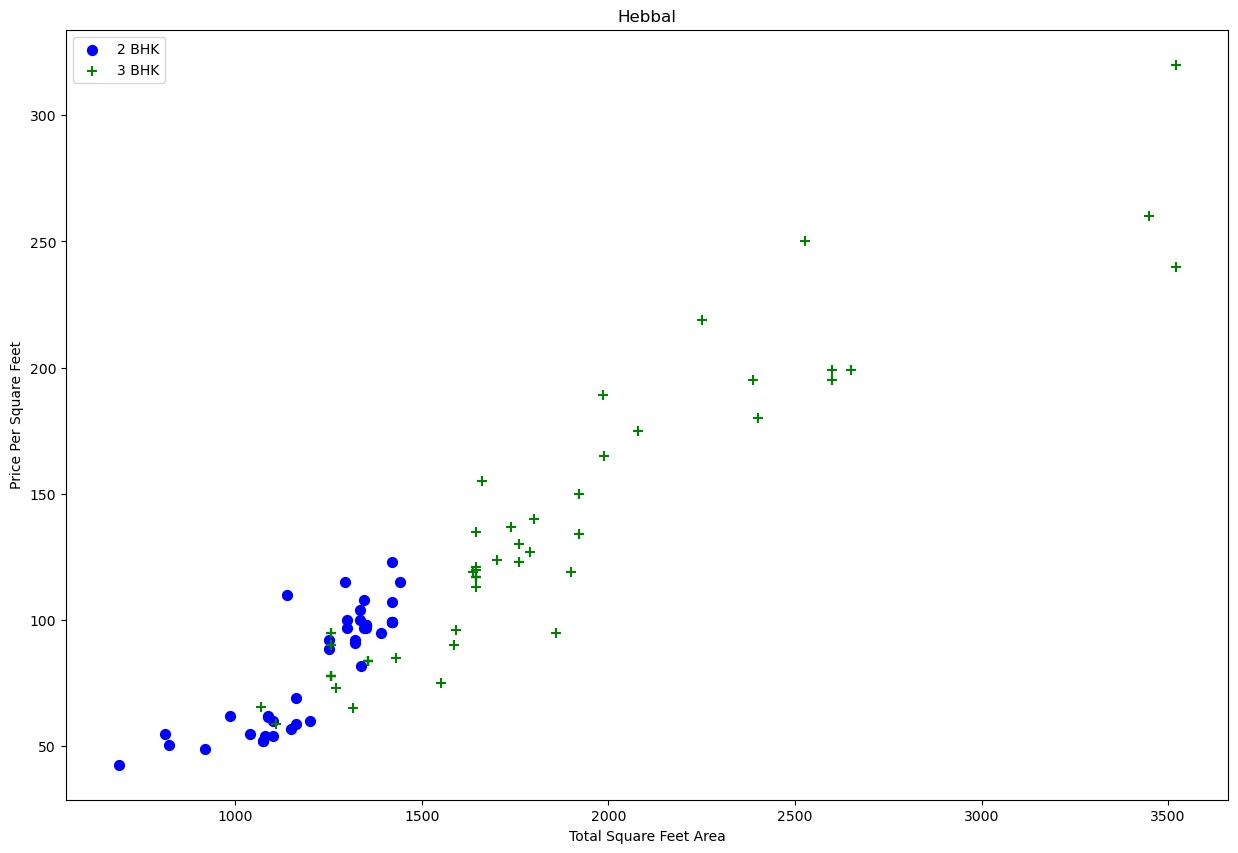

In [37]:
##property prices of 2bhk>3bhk for same sqft area --
#visualisation of how many such cases 
##fn - give scatter plot 


def plot_scatter_chart(df,location):
    bhk2= df[(df.location == location) & (df.bhk ==2)]
    bhk3= df[(df.location == location) & (df.bhk ==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue', label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green', label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df8,"Hebbal")   #blue --2bhk green - 3bhk 
## 1700 sqft in graph 2bhk>3bhk ---- remove these outliers--Rajaji Nagar


In [38]:
#remove such outliers - 

def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'): #every location df
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'): #new df - bhk 
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
                
            }
        for bhk, bhk_df in location_df.groupby('bhk'): # use same for loop and remove values with mean (price per sqft)less than previous df
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df9= remove_bhk_outliers(df8)
df9.shape

(7317, 7)

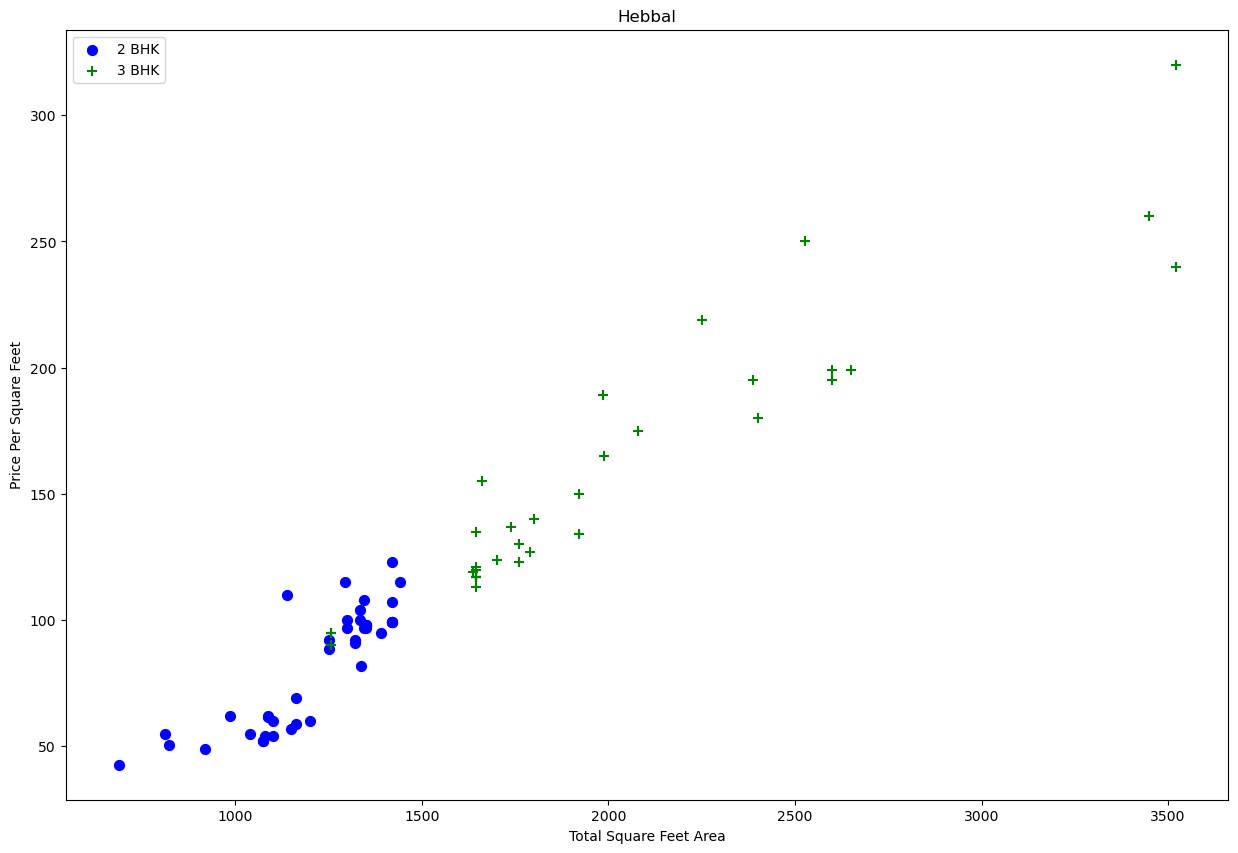

In [39]:
plot_scatter_chart(df9,"Hebbal")

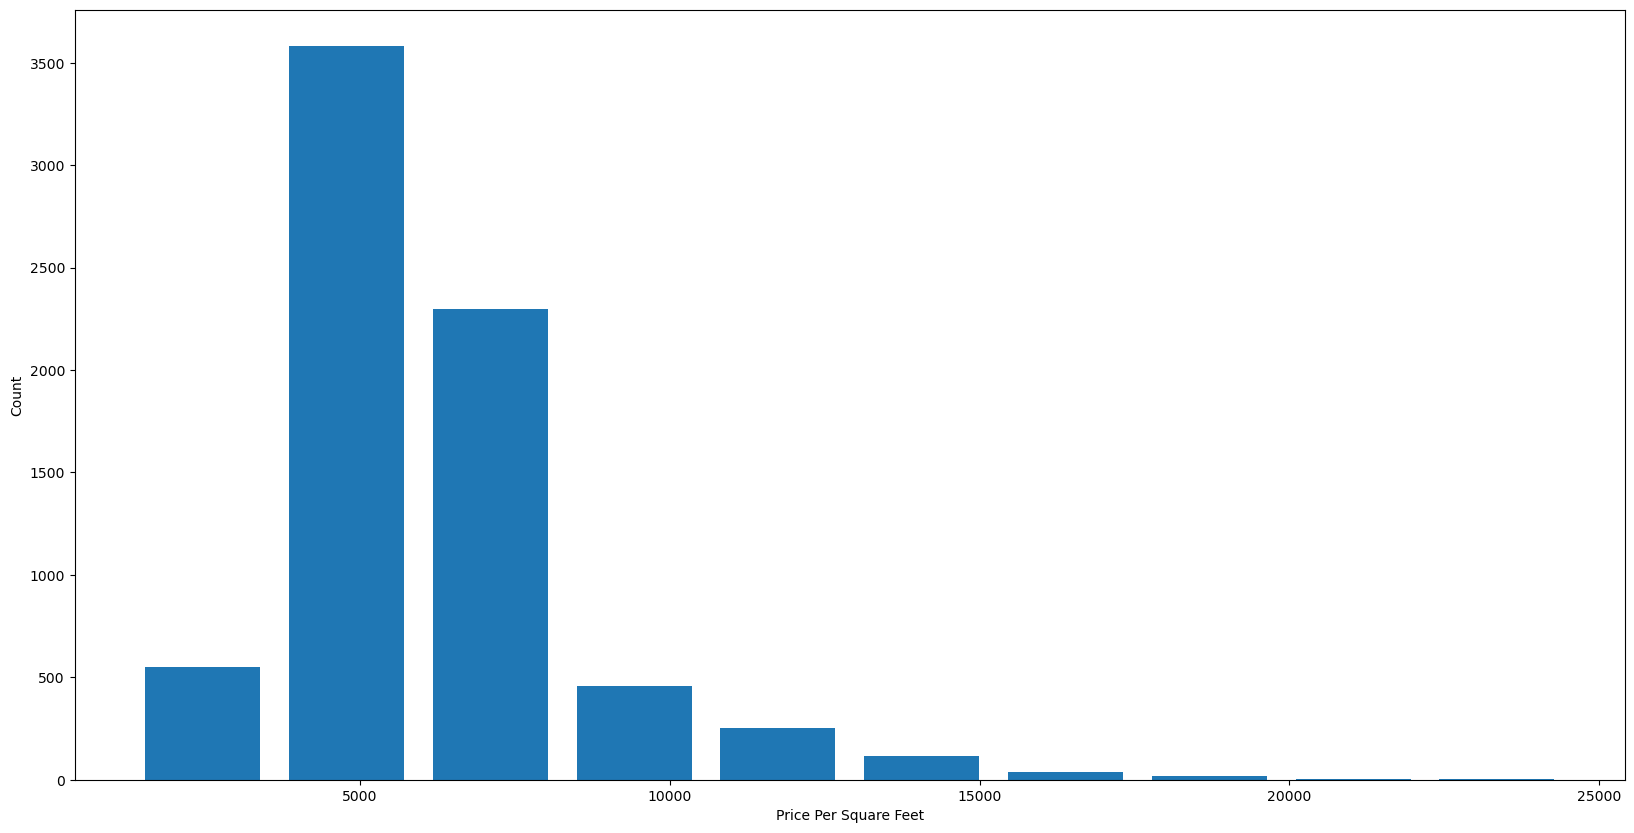

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df9.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()
##bell curve 
##dataset has normal distribution

In [41]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [42]:
df9[df9.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [43]:
#figure out criteria to remove bathroom outlier(business manager decides this)
#criteria - bathroom = no. of bedrooms + 2 < outlier

Text(0, 0.5, 'Count')

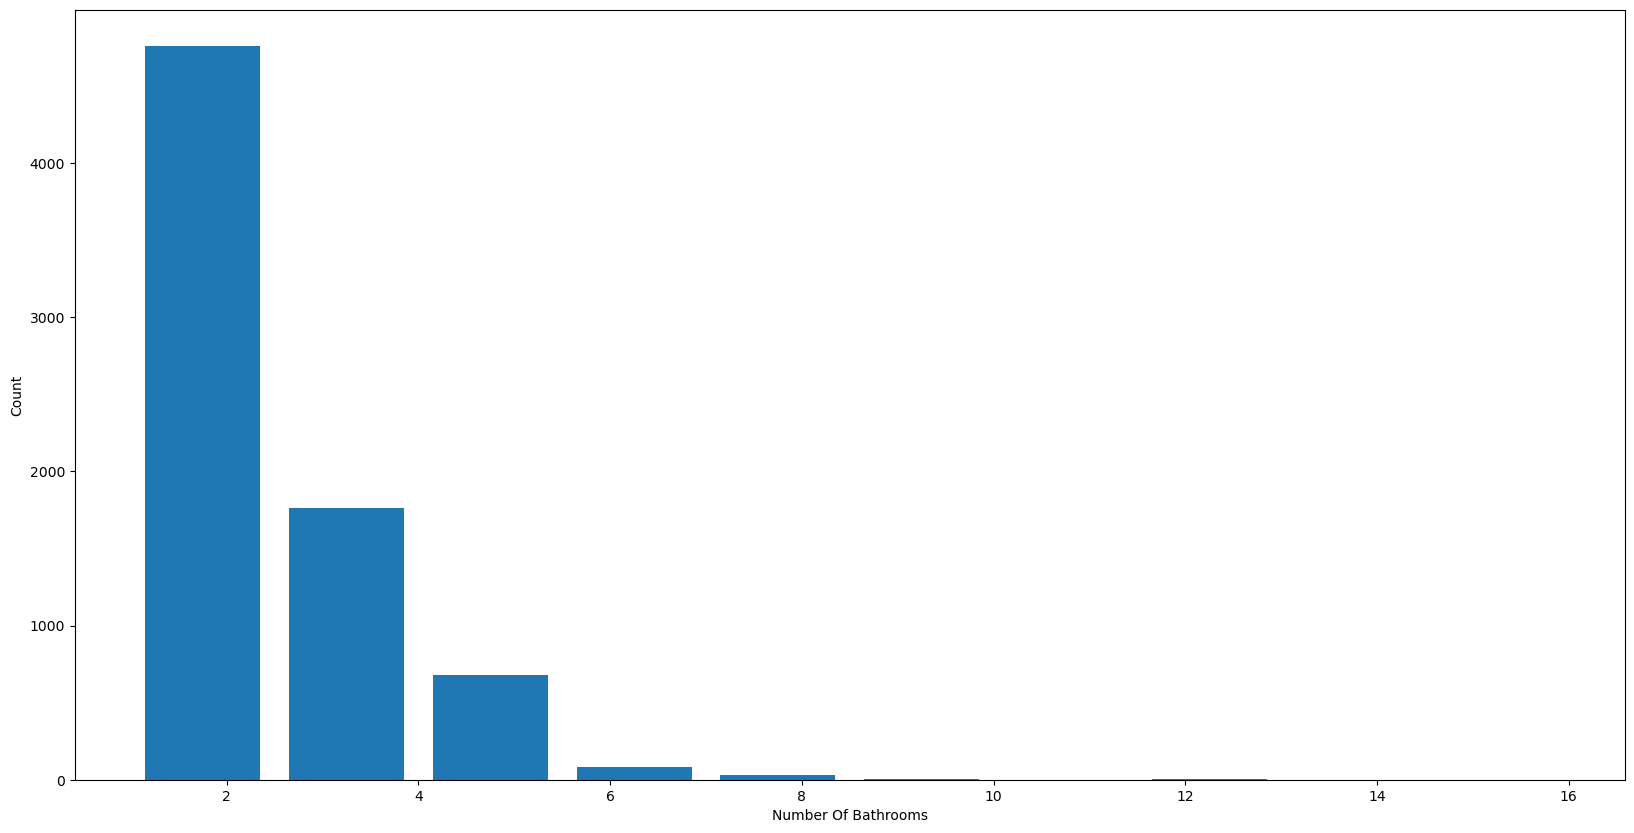

In [44]:
plt.hist(df9.bath , rwidth=0.8)
plt.xlabel("Number Of Bathrooms")
plt.ylabel("Count")

In [45]:
df9[df9.bath>df9.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df10= df9[df9.bath<df9.bhk+2]
df10.shape

(7239, 7)

In [47]:
### data frame looks clean and start modelling
#drop some unnecessary features - price_per_sqft(used for outlier detection only) , size 


In [48]:
df11=df10.drop(['size','price_per_sqft'],axis='columns')
df11.head(10)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


In [49]:
df11.shape

(7239, 5)

In [50]:
dummies = pd.get_dummies(df11.location) #text column- numeric column using one hot encoding or dummies
dummies.head(3) #created a df for these dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df12=pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df13=df12.drop('location',axis='columns')
df13.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df13.shape 

#model training

(7239, 244)

In [54]:
#x should contain independant variable and dependant variable is price 
#drop x
X = df13.drop('price',axis='columns')
X.head()  # X needed for model training containg all independant variable


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
Y=df13.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2 ,random_state=10)
# test size = 0.2 === 20% of samples to be test samples ## 80% model training


In [57]:
#create linear regression model
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lr_clf = LinearRegression()

# Call the fit method on X_train and Y_train
lr_clf.fit(X_train, Y_train) #model is trained

# Evaluate the score to see how good our model is
lr_clf.score(X_test, Y_test)


0.8629132245229447

In [58]:
#score is 86%
#use kfold cross validation -- figure out the best possible model 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5 ,test_size=0.2, random_state=0) #shuffle split will randomize samples - equal distribution of data points
cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [59]:
#more than 80% results-- 
#try other regression techniques(lasso r , decision tree r) 
#figure out which algo gives the best score - use grid search cv 
#grid search cv - api provided by sklearn which run model on different regessors and parameters

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
#hyper parameter tuning also applied -- for particular algo
def find_best_model(X,Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' :{
                'normalize' : [True, False]
            }  
        },
        'lasso' :{
            'model' : Lasso(),
            'params' :{
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic'] }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' :{
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best', 'random'] 
            }
        }
    }    
    scores=[]#scores will be stored in this list
    cv= ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X,Y)

/Users/sarakulshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/sarakulshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sk

,model,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.726802,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.713917,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [69]:
#linear regression is the best fit
#using the lr clf already calculated - property price prediction for samples to test out 
#making a property predict function
X.columns
#np.where(X.columns=='2nd Stage Nagarbhavi')[0][0] #gives the index of the colums

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [70]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]= sqft
    x[1]= bath
    x[2]= bhk
    if loc_index >= 0: #240+ loc colums so locating the appropirate columns
        x[loc_index] = 1 # set the location index as 1
        
    return lr_clf.predict([x])[0]

In [71]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

/Users/sarakulshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.8657025831149

In [72]:
predict_price('1st Phase JP Nagar', 1000, 3, 2)

/Users/sarakulshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.58264928988302

In [73]:
predict_price('Indira Nagar', 1000, 2, 2)

/Users/sarakulshrestha/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.3119773317967

In [ ]:
#model is built
#export the model to a pickle file 
#it will be used by python flask server

In [74]:
import pickle
with open ('blr_home_prices_model.pickle' , 'wb') as f:
    pickle.dump(lr_clf,f)
#file size is 8kb very small - just stores the intercepts coefficients etc

In [75]:
#other than model also need column info - json file 
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [ ]:
#write a python flask server(backend for UI) whch can serve a http request made from ui which can predict the prices 